In [1]:
import numpy as np
import pandas as pd
import openpyxl as opx

In [2]:
# wb = opx.load_workbook("datasets/Soccer Salaries.xlsx")
wb = pd.ExcelFile('datasets/Soccer Salaries.xlsx')
res = wb.sheet_names
print(res)

['EPL', 'Bundesliga', 'Serie A', 'La Liga', 'Ligue 1', 'MLS', 'NFL', 'NBA', 'MLB', 'NHL', 'WNBA']


In [3]:
dataset = {}

for i in res:
    dataset[i] = pd.read_excel("datasets/Soccer Salaries.xlsx",sheet_name = i)

In [4]:
dataset.keys()

dict_keys(['EPL', 'Bundesliga', 'Serie A', 'La Liga', 'Ligue 1', 'MLS', 'NFL', 'NBA', 'MLB', 'NHL', 'WNBA'])

In [5]:
liga_19 = dataset['Serie A'].sort_values(by="2019-20 Salary", ascending = False)
liga_19.shape
liga_19.columns

Index(['Rank', 'Player', 'Weekly Salary', 'Pos.', 'Age', 'Status',
       'Length (Yrs)', '2018-19 Salary', '2019-20 Salary', '2020-21 Salary',
       '2021-22 Salary', '2022-23 Salary', '2023-24 Salary', '2024-25 Salary',
       'Club'],
      dtype='object')

In [6]:
boolean_mask = liga_19["2020-21 Salary"] != 0

In [7]:
liga_19 = liga_19.loc[boolean_mask]
liga_19.shape

(285, 15)

In [8]:
# liga_19[liga_19["2019-20 Salary"] != np.nan]

In [9]:
liga_19 = liga_19.dropna()

In [10]:
liga_19.head()

,Rank,Player,Weekly Salary,Pos.,Age,Status,Length (Yrs),2018-19 Salary,2019-20 Salary,2020-21 Salary,2021-22 Salary,2022-23 Salary,2023-24 Salary,2024-25 Salary,Club
0,1,Cristiano Ronaldo (http://www.capology.com/soc...,1248536,LW,34,Starter,4,64923873,64923873,64923873,64923873,0,0,0,Juventus
1,2,Paulo Dybala (http://www.capology.com/soccer/p...,281930,SS,25,Starter,4,14660375,14660375,14660375,14660375,0,0,0,Juventus
2,3,Miralem Pjanic (http://www.capology.com/soccer...,261791,CM,29,Starter,5,13613125,13613125,13613125,13613125,13613125,0,0,Juventus
3,4,Douglas Costa (http://www.capology.com/soccer/...,241651,RW,28,Reserve,4,12565874,12565874,12565874,12565874,0,0,0,Juventus
4,5,Gianluigi Donnarumma (http://www.capology.com/...,241651,GK,20,Starter,3,12565874,12565874,12565874,0,0,0,0,AC Milan


In [11]:
liga_19["Age"].value_counts()

24    33
25    30
27    28
26    27
21    26
28    19
23    19
20    18
22    15
32    13
30    12
29    12
31    11
19    10
33     4
35     3
18     2
34     2
36     1
Name: Age, dtype: int64

In [12]:
liga_19["Age"].value_counts().sort_index()

18     2
19    10
20    18
21    26
22    15
23    19
24    33
25    30
26    27
27    28
28    19
29    12
30    12
31    11
32    13
33     4
34     2
35     3
36     1
Name: Age, dtype: int64

<AxesSubplot:>

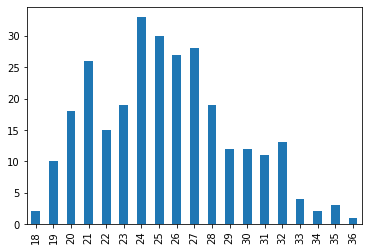

In [13]:
liga_19["Age"].value_counts().sort_index().plot.bar()

<AxesSubplot:ylabel='Frequency'>

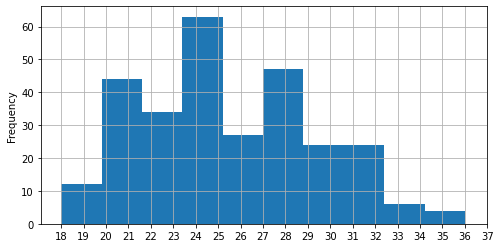

In [14]:
liga_19["Age"].plot.hist(bins = 10, xticks = range(18,38,1), grid =True,figsize=(8,4))

In [15]:
(liga_19["Age"].max() - liga_19["Age"].min())/10

1.8

In [16]:
liga_19["Age"].value_counts(bins = 10).sort_index()

(17.980999999999998, 19.8]    12
(19.8, 21.6]                  44
(21.6, 23.4]                  34
(23.4, 25.2]                  63
(25.2, 27.0]                  55
(27.0, 28.8]                  19
(28.8, 30.6]                  24
(30.6, 32.4]                  24
(32.4, 34.2]                   6
(34.2, 36.0]                   4
Name: Age, dtype: int64

In [17]:
age_interval = pd.interval_range(start=15,end=40,freq=5,closed='right')
age_interval

IntervalIndex([(15, 20], (20, 25], (25, 30], (30, 35], (35, 40]],
              closed='right',
              dtype='interval[int64]')

In [18]:
age_interval_frq = pd.Series(index=age_interval,data=0)
age_interval_frq

(15, 20]    0
(20, 25]    0
(25, 30]    0
(30, 35]    0
(35, 40]    0
dtype: int64

In [19]:
for i in liga_19["Age"]: # 31
    for j in age_interval: # (30, 35] 
        if i in j:
            age_interval_frq.loc[j] += 1

In [20]:
age_interval_frq

(15, 20]     30
(20, 25]    123
(25, 30]     98
(30, 35]     33
(35, 40]      1
dtype: int64

In [21]:
i = 36
for j in age_interval: # (30, 35] 
    if i in j:
        print(j)

(35, 40]


In [22]:
bins_list = list(range(15,41,5))
print(bins_list)

[15, 20, 25, 30, 35, 40]


<AxesSubplot:ylabel='Frequency'>

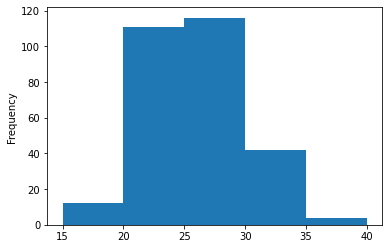

In [23]:
liga_19["Age"].plot.hist(bins=bins_list)

In [24]:
liga_19["Age"].value_counts(bins=bins_list).sort_index()

(14.999, 20.0]     30
(20.0, 25.0]      123
(25.0, 30.0]       98
(30.0, 35.0]       33
(35.0, 40.0]        1
Name: Age, dtype: int64

In [25]:
top_salaries = liga_19.head(50)
top_salaries['Player']

0     Cristiano Ronaldo (http://www.capology.com/soc...
1     Paulo Dybala (http://www.capology.com/soccer/p...
2     Miralem Pjanic (http://www.capology.com/soccer...
3     Douglas Costa (http://www.capology.com/soccer/...
4     Gianluigi Donnarumma (http://www.capology.com/...
5     Leonardo Bonucci (http://www.capology.com/socc...
6     Mario Mandzukic (http://www.capology.com/socce...
7     Emre Can (http://www.capology.com/soccer/playe...
8     Lorenzo Insigne (http://www.capology.com/socce...
10    Mauro Icardi (http://www.capology.com/soccer/p...
11    Radja Nainggolan (http://www.capology.com/socc...
15    Ivan Perisic (http://www.capology.com/soccer/p...
17    Sami Khedira (http://www.capology.com/soccer/p...
18    Wojciech Szczesny (http://www.capology.com/soc...
19    Stefan De Vrij (http://www.capology.com/soccer...
23    Kalidou Koulibaly (http://www.capology.com/soc...
20    Alessio Romagnoli (http://www.capology.com/soc...
21    Javier Pastore (http://www.capology.com/so

# Eid Mubarak

In [26]:
def Ameer_ki_kahani(dataframe,column):

    ax = dataframe.head(5).plot.bar(x = "Player",y = column,grid = True ,color="coral")
    high_salary = list(dataframe[column].head(5))
    a={i : high_salary[l] for l,i in enumerate(ax.patches)} 
    for loc,i in enumerate(a):
        salary = str(i.get_height())
        ax.annotate(text=salary.replace(salary[-1:-7:-1][-1::-1],"M+"),xy=(-.2+loc,i.get_height()),rotation=0)

    return ax
        
        

In [27]:
len("Lionel Messi (http://www.capology.com/soccer/p...")

49

In [28]:
players = top_salaries["Player"]
f = []
for i in players:
    j,k = i.split(" ")[0:2:]
    if len(j+" "+k) >= 50:
        f.append(j)
    else:
        f.append(j+" "+k)

In [29]:
top_salaries = top_salaries.sort_values("2020-21 Salary", ascending=False)

In [30]:
# top_salaries.head(10)

In [31]:
'80023053.0'[-1:-9:-1][-1::-1]

'023053.0'

In [32]:
salary = top_salaries["2020-21 Salary"]
# s = []
# for i in salary:
#     j = str(i)
#     j = j.replace(j[-1:-7:-1][-1::-1],"M+")
#     s.append(j)

In [33]:
# s

In [34]:
# top_salaries["2020-21 Salary"] = pd.DataFrame(s)

In [35]:
top_salaries["Player"] = pd.DataFrame(f)

In [36]:
top_salaries = top_salaries.dropna()

In [37]:
# top_salaries

In [38]:
top_salaries["Club"].value_counts()

Juventus       13
Inter Milan     8
AC Milan        6
Roma            5
Napoli          3
Name: Club, dtype: int64

<AxesSubplot:>

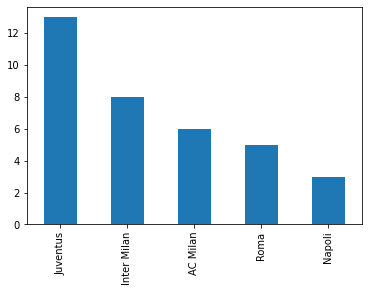

In [39]:
top_salaries["Club"].value_counts().plot.bar()

In [40]:
# unique = top_salaries["Club"].unique()
# unique

In [41]:
unique = top_salaries["Club"].value_counts().index
unique

Index(['Juventus', 'Inter Milan', 'AC Milan', 'Roma', 'Napoli'], dtype='object')

In [42]:
club_sum = {}

for i in unique:
    club_sum[i] = round(top_salaries.loc[top_salaries["Club"] == i,"2019-20 Salary"].sum())

In [43]:
club_sum

{'Juventus': 180740047,
 'Inter Milan': 60107200,
 'AC Milan': 42935006,
 'Roma': 31204897,
 'Napoli': 22200352}

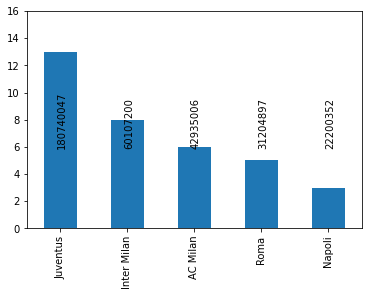

In [44]:
ax = top_salaries["Club"].value_counts().plot.bar(yticks = range(0,18,2))

loc = 0
for i in club_sum.values():
    ax.annotate(text=i,xy=(-.05+loc,6),rotation=90)
    loc += 1



In [45]:
ax.patches[1].get_height()

8

In [46]:
print(res[0:5])

['EPL', 'Bundesliga', 'Serie A', 'La Liga', 'Ligue 1']


In [47]:
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())
totals

[13, 8, 6, 5, 3]

In [48]:
top_salaries.head()

,Rank,Player,Weekly Salary,Pos.,Age,Status,Length (Yrs),2018-19 Salary,2019-20 Salary,2020-21 Salary,2021-22 Salary,2022-23 Salary,2023-24 Salary,2024-25 Salary,Club
0,1,Cristiano Ronaldo,1248536,LW,34,Starter,4,64923873,64923873,64923873,64923873,0,0,0,Juventus
1,2,Paulo Dybala,281930,SS,25,Starter,4,14660375,14660375,14660375,14660375,0,0,0,Juventus
2,3,Miralem Pjanic,261791,CM,29,Starter,5,13613125,13613125,13613125,13613125,13613125,0,0,Juventus
3,4,Douglas Costa,241651,RW,28,Reserve,4,12565874,12565874,12565874,12565874,0,0,0,Juventus
4,5,Gianluigi Donnarumma,241651,GK,20,Starter,3,12565874,12565874,12565874,0,0,0,0,AC Milan


<AxesSubplot:xlabel='Player'>

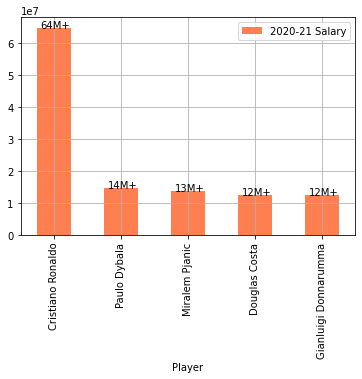

In [49]:
Ameer_ki_kahani(top_salaries,"2020-21 Salary")

<AxesSubplot:xlabel='Player'>

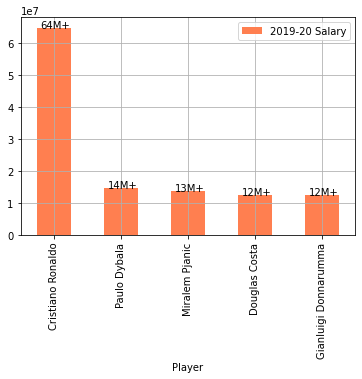

In [50]:
Ameer_ki_kahani(top_salaries,"2019-20 Salary")

In [51]:
top_salaries.head(10)

,Rank,Player,Weekly Salary,Pos.,Age,Status,Length (Yrs),2018-19 Salary,2019-20 Salary,2020-21 Salary,2021-22 Salary,2022-23 Salary,2023-24 Salary,2024-25 Salary,Club
0,1,Cristiano Ronaldo,1248536,LW,34,Starter,4,64923873,64923873,64923873,64923873,0,0,0,Juventus
1,2,Paulo Dybala,281930,SS,25,Starter,4,14660375,14660375,14660375,14660375,0,0,0,Juventus
2,3,Miralem Pjanic,261791,CM,29,Starter,5,13613125,13613125,13613125,13613125,13613125,0,0,Juventus
3,4,Douglas Costa,241651,RW,28,Reserve,4,12565874,12565874,12565874,12565874,0,0,0,Juventus
4,5,Gianluigi Donnarumma,241651,GK,20,Starter,3,12565874,12565874,12565874,0,0,0,0,AC Milan
5,6,Leonardo Bonucci,221512,CB,31,Starter,5,11518624,11518624,11518624,11518624,11518624,0,0,Juventus
6,7,Mario Mandzukic,221512,CF,32,Starter,3,11518624,11518624,11518624,0,0,0,0,Juventus
7,8,Emre Can,201373,DM,25,Reserve,4,10471373,10471373,10471373,10471373,0,0,0,Juventus
8,9,Lorenzo Insigne,185278,LW,27,Starter,4,9634478,9634478,9634478,9634478,0,0,0,Napoli
10,11,Radja Nainggolan,181233,CF,26,Starter,3,9424123,9424123,9424123,0,0,0,0,Inter Milan


In [52]:
salary[0]

64923873

### Abhi to Khahani Shuru hoi hai

In [53]:
p = []
for i in players:
    j,k = i.split(" ")[0:2:]
    if len(j+" "+k) >= 50:
        p.append(j)
    else:
        p.append(j+" "+k)
s = []
for i in salary:
    j = str(i)
    j = j.replace(j[-1:-7:-1][-1::-1],"M+")
    s.append(j)

    
high_salary = {p[i]:s[i] for i in range(50)}


In [54]:
len(players)

50

In [55]:
high_salary = tuple(high_salary.values())[:5]
high_salary

('64M+', '14M+', '13M+', '12M+', '12M+')

In [56]:
top_salaries["Player"] = pd.DataFrame(p)
# a={}
# for l,i in enumerate(ax.patches):
#     a[i] = high_salary[l]
a={i : high_salary[l] for l,i in enumerate(ax.patches)} 
a

{<matplotlib.patches.Rectangle at 0x288f2a44df0>: '64M+',
 <matplotlib.patches.Rectangle at 0x288f2a44c70>: '14M+',
 <matplotlib.patches.Rectangle at 0x288f2a50310>: '13M+',
 <matplotlib.patches.Rectangle at 0x288f2a50610>: '12M+',
 <matplotlib.patches.Rectangle at 0x288f2a508e0>: '12M+'}

AxesSubplot(0.125,0.125;0.775x0.755)


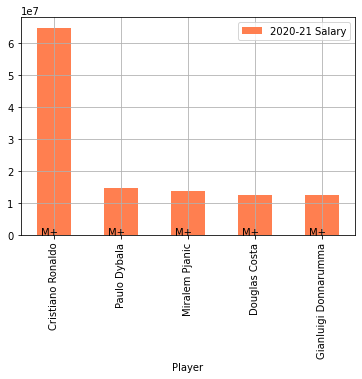

In [57]:

ax = top_salaries.head().plot.bar(x = "Player",
                                y = "2020-21 Salary",grid = True ,color="coral")
loc = 0
for i in a:
    salary = str(i.get_height())
    ax.annotate(text=salary.replace(salary[-1:-7:-1][-1::-1],"M+"),xy=(loc-.2,i.get_height()),
                rotation=0)
    loc += 1

print(ax)

In [58]:
"80023053".replace("80023053"[-1:-7:-1][-1::-1],"M+")

'80M+'

In [59]:
print(ax.patch.get_height)

<bound method Rectangle.get_height of <matplotlib.patches.Rectangle object at 0x00000288F2B775B0>>
